# This jupyter notebook is prepared by Zachary Hull.

# 1. Load Data and perform basic EDA (4pts total)

### 1.1 import libraries: numpy, pandas, matplotlib.pyplot, seaborn, sklearn (1pt)

In [2]:
# TODO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

### 1.2 Upload the dataset to your Google Drive, then using the following code, import the data to a pandas dataframe and show the count of rows and columns (0.5pt)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
from google.colab import drive

csv_name = '/content/drive/MyDrive/hr_data_.csv'
with open(csv_name, 'r') as file:
  df = pd.read_csv(csv_name)

print(df.shape)

(8955, 15)


### 1.3 Show the top 7 and bottom 7 rows (0.5pt)

In [5]:
# TODO
top_data = df.head(7)
bottom_data = df.tail(7)
print(top_data)
print(bottom_data)

   Unnamed: 0  enrollee_id      city  city_development_index gender  \
0           1        29725   city_40                   0.776   Male   
1           4          666  city_162                   0.767   Male   
2           7          402   city_46                   0.762   Male   
3           8        27107  city_103                   0.920   Male   
4          11        23853  city_103                   0.920   Male   
5          12        25619   city_61                   0.913   Male   
6          15         6588  city_114                   0.926   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   
5  Has relevent experience       no

### 1.4 Show if any column has null values (0.5pt)

In [6]:
# TODO
df.isnull().values.any()

False

### 1.5 Show/Plot the count of unique target labels and discuss its imbalances and possible issues in using it for classification. (1.5pt)

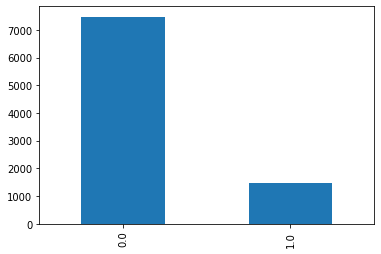

In [7]:
# TODO
pd.value_counts(df["target"]).plot.bar()
plt.show()
#There are far more 0's in the target column, so there are not asa many people looking for a job change

# 2. Feature Selection and Pre-processing (25 pts total)

## 2.1 Preprocessing City (1+1+1+1 = 4pts total)

### 2.1.1 Plot no. of records per city so that the highest city counts are shown in descending order (1pt)

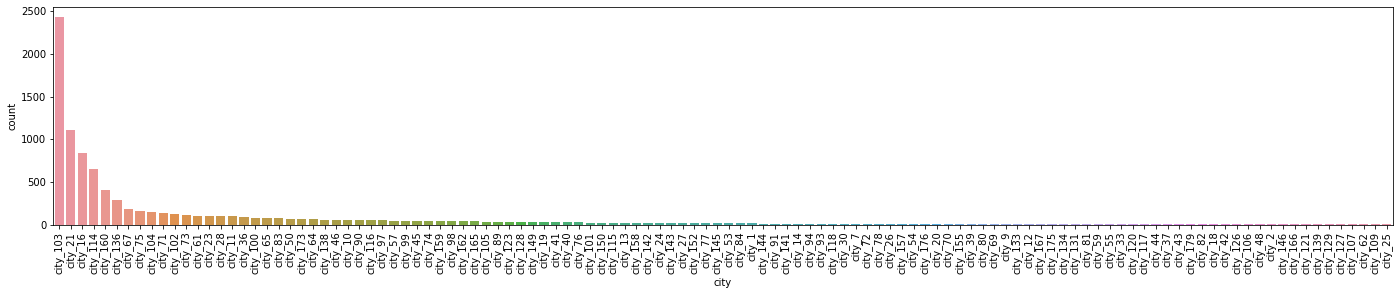

In [8]:
# TODO
plt.figure(figsize=(24, 4))
plt.xticks(rotation=90)
sns.countplot(data = df, x="city", order=df['city'].value_counts().index)
plt.show()

### 2.1.2 How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (1pt)

In [9]:
# TODO
city_count = df['city'].value_counts()
top4 = city_count['city_103'] + city_count['city_21'] + city_count['city_16'] + city_count['city_114']
print("Rows belonging to top 4 cities:", top4)
rest = 8954 - top4
print("Rows belonging to the rest of the cities:", rest)
top4_list = [city_count['city_103'], city_count['city_21'], city_count['city_16'], city_count['city_114']]

Rows belonging to top 4 cities: 5021
Rows belonging to the rest of the cities: 3933


### 2.1.3 Replace the city name with city_others if the city name is not among the top 4 (1pt)

In [10]:
# TODO
name_df = df['city'].apply(lambda x: x if x in ['city_103', 'city_21', 'city_16', 'city_114'] else 'city_other')
print(name_df)

0       city_other
1       city_other
2       city_other
3         city_103
4         city_103
           ...    
8950       city_21
8951      city_103
8952    city_other
8953      city_103
8954      city_103
Name: city, Length: 8955, dtype: object


### 2.1.4 Show some sample data that the records have changed correctly. (1pt)

In [11]:
# TODO
city_count2 = name_df.value_counts()
print(city_count2)

city_other    3934
city_103      2426
city_21       1111
city_16        836
city_114       648
Name: city, dtype: int64


## 2.2. Preprocessing Education Level (1+2+2+1 = 6pts total)

### 2.2.1. Show the unique values of education level. (1pt)

In [12]:
# TODO
unique_df = df['education_level'].unique()
print(unique_df)

['Graduate' 'Masters' 'Phd']


### 2.2.2. Write a function named replace_labels() that can replace labels using given {old_label:new_label} dictionary (2pts)

Parameters: (1) dataframe, (2) a column name, (3) a dictionary with {old_label:new_label} mapping. 

Returns: a dataframe with specified column values replaced with the  


In [13]:
# TODO
def replace_labels(df, column, dictionary):
  df[column] = df[column].replace(dictionary)
  return df

### 2.2.3. Using the replace_labels() function you just created, replace education_level column with ordinal values. The mapping can be like "Graduate":0, "Masters":1, "Phd":2 . (2pt)

In [14]:
# TODO
replace_labels(df, 'education_level', {'Graduate':0, 'Masters':1, 'Phd':2})

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,0,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,1,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,0,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,0,Humanities,7.0,10/49,Funded Startup,1,25,0.0


### 2.2.4 Show some sample data that the records have changed appropriately (1pt)

In [15]:
# TODO
print(df['education_level'])
count_edu = df['education_level'].value_counts()
print(count_edu)

0       0
1       1
2       0
3       0
4       0
       ..
8950    0
8951    1
8952    0
8953    0
8954    0
Name: education_level, Length: 8955, dtype: int64
0    6252
1    2449
2     254
Name: education_level, dtype: int64


## 2.3. Preprocessing company_size (2+2+1 = 5pts total)

### 2.3.1 Show the unique values of the company_size column and their counts (2pt)

In [16]:
# TODO
unique_comp = df['company_size'].unique()
print(unique_comp)
size_count = df['company_size'].value_counts()
print(size_count)

['50-99' '<10' '5000-9999' '1000-4999' '10/49' '100-500' '10000+'
 '500-999']
50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64


### 2.3.2 Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (2pt)
(Hint: you can use the replace_labels() function you created before.)

In [17]:
# TODO
replace_labels(df, 'company_size', {'<10':0, '10/49':1, '50-99':2, '100-500':3, '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7})

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,>4,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,0,STEM,1.0,3,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,1,STEM,9.0,2,Pvt Ltd,1,36,1.0
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,0,STEM,10.0,3,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,0,Humanities,7.0,1,Funded Startup,1,25,0.0


### 2.3.3 Show the updated unique values to validate they changed appropriately (1pt)

In [18]:
# TODO
print(df['company_size'])
count_comp = df['company_size'].value_counts()
print(count_comp)

0       2
1       2
2       0
3       2
4       6
       ..
8950    3
8951    2
8952    3
8953    1
8954    2
Name: company_size, Length: 8955, dtype: int64
2    1986
3    1814
7    1449
1     951
5     930
0     840
4     592
6     393
Name: company_size, dtype: int64


## 2.4. Preprocessing last_new_job (1+2+1 = 4pts total)

### 2.4.1 Show unique values of the last_new_job column (1pt)

In [19]:
# TODO
unique_job = df['last_new_job'].unique()
print(unique_job)

['>4' '4' '1' '3' '2' 'never']


### 2.4.2 Convert the values of this column to never->0, 1->1,....>4 -->5 (2pt)
Hint: replace_labels()

In [20]:
# TODO
replace_labels(df, 'last_new_job', {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5})

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,5,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,5,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,0,STEM,1.0,3,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,1,STEM,9.0,2,Pvt Ltd,1,36,1.0
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,0,STEM,10.0,3,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,0,Humanities,7.0,1,Funded Startup,1,25,0.0


### 2.4.3 Show the updated values (1pt)

In [21]:
# TODO
print(df['last_new_job'])
count_job = df['last_new_job'].value_counts()
print(count_job)

0       5
1       4
2       5
3       1
4       1
       ..
8950    1
8951    1
8952    3
8953    1
8954    4
Name: last_new_job, Length: 8955, dtype: int64
1    3838
5    1965
2    1570
3     610
4     599
0     373
Name: last_new_job, dtype: int64


## 2.5 Preprocessing other columns (2pt total)

### 2.5.1 Drop the enrollee_id, any unnamed columns, and any duplicate columns (if you created multiple columns one with original and one with updated, then remove the original one) (2pt)

In [22]:
# TODO
df = df.drop(['Unnamed: 0', 'enrollee_id'], axis=1)
print(df)

          city  city_development_index  gender      relevent_experience  \
0      city_40                   0.776    Male   No relevent experience   
1     city_162                   0.767    Male  Has relevent experience   
2      city_46                   0.762    Male  Has relevent experience   
3     city_103                   0.920    Male  Has relevent experience   
4     city_103                   0.920    Male  Has relevent experience   
...        ...                     ...     ...                      ...   
8950   city_21                   0.624    Male   No relevent experience   
8951  city_103                   0.920    Male  Has relevent experience   
8952  city_160                   0.920  Female  Has relevent experience   
8953  city_103                   0.920  Female  Has relevent experience   
8954  city_103                   0.920    Male  Has relevent experience   

     enrolled_university  education_level major_discipline  experience  \
0          no_enrollment 

In [ ]:
# TODO

## 2.6 Feature Scaling (3+1 = 4ps total)

### 2.6.1 Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the numeric columns (3pt)

In [23]:
# TODO
from sklearn.preprocessing import MinMaxScaler
numdf = df.select_dtypes(include=np.number)
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[['city_development_index', 'education_level', 'experience', 'company_size', 'last_new_job', 'training_hours', 'target']])

In [ ]:
# TODO

### 2.6.2 Show some of the scaled records. (1pt)

In [24]:
# TODO
print(scaled_df)

[[0.65469062 0.         0.71428571 ... 1.         0.13731343 0.        ]
 [0.63672655 0.5        1.         ... 0.8        0.02089552 0.        ]
 [0.62674651 0.         0.61904762 ... 1.         0.05074627 1.        ]
 ...
 [0.94211577 0.         0.47619048 ... 0.6        0.06567164 0.        ]
 [0.94211577 0.         0.33333333 ... 0.2        0.07164179 0.        ]
 [0.94211577 0.         1.         ... 0.8        0.12835821 0.        ]]


# 3. X/Y and Training/Test Split with stratified sampling (15pts in total)

### 3.1 Using a lot of features with categorical values is not memory-efficient. Use a LabelEncoder() to convert all the categorical columns to numeric labels. (This task is similar to previous assignment A1) (2pt)

In [25]:
# TODO
from sklearn import preprocessing
df_list = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']
for x in df_list:
  le = preprocessing.LabelEncoder()
  df[x] = le.fit_transform(df[x])
print(df)

      city  city_development_index  gender  relevent_experience  \
0       72                   0.776       1                    1   
1       48                   0.767       1                    0   
2       78                   0.762       1                    0   
3        5                   0.920       1                    0   
4        5                   0.920       1                    0   
...    ...                     ...     ...                  ...   
8950    60                   0.624       1                    1   
8951     5                   0.920       1                    0   
8952    47                   0.920       0                    0   
8953     5                   0.920       0                    0   
8954     5                   0.920       1                    0   

      enrolled_university  education_level  major_discipline  experience  \
0                       2                0                 5        15.0   
1                       2                1 

### 3.2 Copy all the features into X and the target to Y (2pt)

In [26]:
# TODO
X = df
X = X.drop(['target'], axis=1)
Y = df['target']

### 3.3 Show the ratio of 1 and 0 in Y. (1pt)

In [27]:
# TODO
count0 = Y.value_counts()[0]
count1 = Y.value_counts()[1]
ratio0 = count0 / 8955
ratio1 = count1 / 8955
print(ratio0)
print(ratio1)

0.834394193188163
0.16560580681183695


### 3.4 Use sklearn's train_test_split() to split the data set into 70% training and 30% test sets. Set random_state to 42. We want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to Y to ensure this. Then show the ratio of 1 and 0 in both train and test target. (4pt)

In [28]:
# TODO
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

### 3.5 Rebalancing (4+2 = 6pts)

3.5.1 Use imblearn's SMOTENC to balance the x_train


When our training set have class imbalance, we often perform over-sampling to generate synthetic data that can help in training. SMOTE is a library by imblearn for this purpose. The usage is fairly straightforward. See documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) and a brief explanation with example [here](https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25)

In [29]:
# TODO
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_train, Y_train)

3.5.2 Did that change the ratio in label? Confirm by printing the ratio in resampled labels.

In [30]:
# TODO
count0_res = Y_res.value_counts()[0]
count1_res = Y_res.value_counts()[1]
ratio0_res = count0_res / 10460
ratio1_res = count1_res / 10460
print(ratio0_res)
print(ratio1_res)

0.5
0.5


# 4. Decision Tree (20pts total)

### 4.1 Initialize a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set. Set a consistent value for random_state parameter so that your result is reproducible. (1pt)

In [31]:
# TODO
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

### 4.2 Use grid search to find out the best combination of values for the parameters: criterion, max_depth, min_samples_split, max_features. Then print the best performing parameters. (4pt)

In [32]:
# TODO
from sklearn.model_selection import GridSearchCV
param = {'criterion': ['gini', 'entropy', 'log_loss'],
         'max_depth': [1,2,3,4,5,6,7,8],
         'min_samples_split': [1,2,3,4,5,6],
         'max_features': ['sqrt', 'log2']}
search = GridSearchCV(dt, param)
search.fit(X_train, Y_train)
print(search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_split=1, random_state=42)


### 4.3 Add the best performing parameter set to the already-initialized Decision Tree model. Then fit it on the train dataset. (2pt)

In [33]:
# TODO
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt', min_samples_split=1, random_state=42)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_split=1, random_state=42)

### 4.4 Import the accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score from scikitlearn's metrics package. Evaluate your Decision Tree on the Test dataset and print all the metrics. (3pt)

In [76]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
Y_pred = dt.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
conf = confusion_matrix(Y_test, Y_pred)
f1s = f1_score(Y_test, Y_pred)
roc = roc_auc_score(Y_test, Y_pred)
print("accuracy score {:.2}".format(acc))
print("precisison score {:.2}".format(prec))
print("recall score {:.2}".format(rec))
print("confusion matrix {}".format(conf[1,1]))
print("f1 score {:.2}".format(f1s))
print("roc auc score {:.2}".format(roc))

accuracy score 0.86
precisison score 0.58
recall score 0.52
confusion matrix 231
f1 score 0.55
roc auc score 0.72


### 4.5 Plot the tree using scikitlearn's tree package. You may need to define a large figure size using matplotlib to have an intelligible figure. (2pt)

[Text(0.5, 0.875, 'x[7] <= 9.5\nentropy = 0.648\nsamples = 6268\nvalue = [5230, 1038]'),
 Text(0.25, 0.625, 'x[1] <= 0.632\nentropy = 0.791\nsamples = 2760\nvalue = [2105, 655]'),
 Text(0.125, 0.375, 'x[11] <= 19.5\nentropy = 0.969\nsamples = 739\nvalue = [293, 446]'),
 Text(0.0625, 0.125, 'entropy = 0.897\nsamples = 134\nvalue = [42, 92]'),
 Text(0.1875, 0.125, 'entropy = 0.979\nsamples = 605\nvalue = [251, 354]'),
 Text(0.375, 0.375, 'x[1] <= 0.889\nentropy = 0.48\nsamples = 2021\nvalue = [1812, 209]'),
 Text(0.3125, 0.125, 'entropy = 0.567\nsamples = 569\nvalue = [493, 76]'),
 Text(0.4375, 0.125, 'entropy = 0.442\nsamples = 1452\nvalue = [1319, 133]'),
 Text(0.75, 0.625, 'x[1] <= 0.642\nentropy = 0.497\nsamples = 3508\nvalue = [3125, 383]'),
 Text(0.625, 0.375, 'x[7] <= 14.5\nentropy = 0.992\nsamples = 195\nvalue = [87, 108]'),
 Text(0.5625, 0.125, 'entropy = 0.939\nsamples = 118\nvalue = [42, 76]'),
 Text(0.6875, 0.125, 'entropy = 0.979\nsamples = 77\nvalue = [45, 32]'),
 Text(0.87

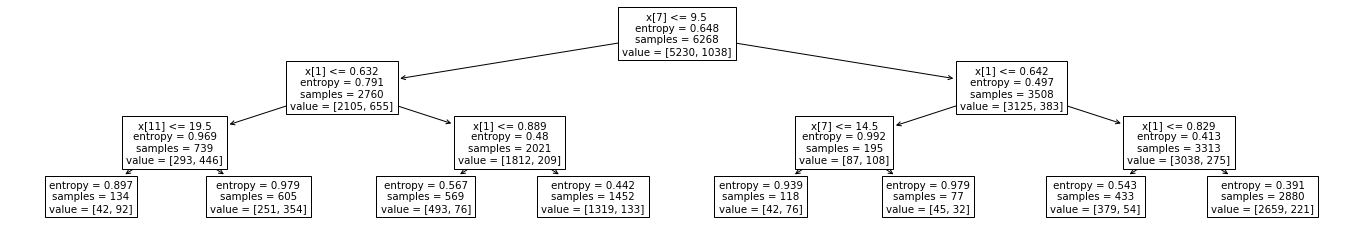

In [38]:
# TODO
from sklearn import tree
plt.figure(figsize=(24, 4))
tree.plot_tree(dt)

### 4.6 Initialize a new Decision Tree model, then use the best set of parameters from Step 4.3 to train it on the balanced train set that you prepared in Step 3.5.1. (3pt)

In [40]:
# TODO
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt', min_samples_split=1, random_state=42)
dt2 = dt2.fit(X_res, Y_res)

### 4.7 Print the evaluation scores (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) from the training on balanced dataset. (3pt)

In [74]:
# TODO
Y_pred2 = dt2.predict(X_test)
acc2 = accuracy_score(Y_test, Y_pred2)
prec2 = precision_score(Y_test, Y_pred2)
rec2 = recall_score(Y_test, Y_pred2)
conf2 = confusion_matrix(Y_test, Y_pred2)
f1s2 = f1_score(Y_test, Y_pred2)
roc2 = roc_auc_score(Y_test, Y_pred2)
print("accuracy score {:.2}".format(acc2))
print("precisison score {:.2}".format(prec2))
print("recall score {:.2}".format(rec2))
print("confusion matrix {}".format(conf2[1, 1]))
print("f1 score {:.2}".format(f1s2))
print("roc auc score {:.2}".format(roc2))

accuracy score 0.76
precisison score 0.37
recall score 0.64
confusion matrix 284
f1 score 0.47
roc auc score 0.71


### 4.8 Discuss any difference between evaluation results from the unbalanced train set and balanced train set. (2pt)

'#TODO'
A difference between the two would be that, with the exception of the confusion matrix, all output values of the balanced train set were lower than the unbalanced training set

# 5. Random Forest Classifier (12pts total)

### 5.1 Use grid search to find best combinations of the following Random Forest parameters: n_estimators, max_depth, min_samples_split and min_samples_leaf. Use your own choice of scoring, criterion, number of folds for cross-validation for the model initialization. Remember the grid search can take a while to finish. (4pt)

In [53]:
# TODO
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
param = {'criterion': ['gini', 'entropy', 'log_loss'],
         'max_depth': [1,2,3,4,5,6,7,8],
         'min_samples_split': [1,2,3,4,5,6,7,8],
         'max_features': ['sqrt', 'log2']}
search3 = GridSearchCV(rfc, param)
search3.fit(X_train, Y_train)
print(search3.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=4,
                       random_state=42)


### 5.2 Print the best combination of parameters and use it to train a Random Forest classifier model. (3pt)

In [54]:
# TODO
rfc = RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=4, random_state=42)
rfc.fit(X_test, Y_test)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=4,
                       random_state=42)

### 5.3  Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (5pt)

In [75]:
# TODO
Y_pred3 = rfc.predict(X_test)
acc3 = accuracy_score(Y_test, Y_pred3)
prec3 = precision_score(Y_test, Y_pred3)
rec3 = recall_score(Y_test, Y_pred3)
conf3 = confusion_matrix(Y_test, Y_pred3)
f1s3 = f1_score(Y_test, Y_pred3)
roc3 = roc_auc_score(Y_test, Y_pred3)
print("accuracy score {:.2}".format(acc3))
print("precisison score {:.2}".format(prec3))
print("recall score {:.2}".format(rec3))
print("confusion matrix {}".format(conf3[1, 1]))
print("f1 score {:.2}".format(f1s3))
print("roc auc score {:.2}".format(roc3))

accuracy score 0.88
precisison score 0.68
recall score 0.53
confusion matrix 234
f1 score 0.59
roc auc score 0.74


# 6. Boosting Classifier (20 pts total)

## 6.1 AdaBoost Classifier (10 pts total)

### 6.1.1 Perform a grid search for best values for parameters={n_estimators, learning_rate} of an AdaBoostClassifier and the given training set. (4pt) 

In [56]:
# TODO
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
param = {'n_estimators': [1,2,3,4],
         'learning_rate': [1,2,3,4]}

search_ada = GridSearchCV(ada, param)
search_ada.fit(X_train, Y_train)
print(search_ada.best_estimator_)

AdaBoostClassifier(learning_rate=1, n_estimators=2, random_state=42)


### 6.1.2 Train an AdaboostClassifier using the best parameter set you found in step 6.1.1 (3pt) 

In [57]:
# TODO
ada = AdaBoostClassifier(learning_rate=1, n_estimators=2, random_state=42)
ada.fit(X_test, Y_test)

AdaBoostClassifier(learning_rate=1, n_estimators=2, random_state=42)

### 6.1.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [73]:
# TODO
Y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(Y_test, Y_pred_ada)
prec_ada = precision_score(Y_test, Y_pred_ada)
rec_ada = recall_score(Y_test, Y_pred_ada)
conf_ada = confusion_matrix(Y_test, Y_pred_ada)
f1s_ada = f1_score(Y_test, Y_pred_ada)
roc_ada = roc_auc_score(Y_test, Y_pred_ada)
print("accuracy score {:.2}".format(acc_ada))
print("precisison score {:.2}".format(prec_ada))
print("recall score {:.2}".format(rec_ada))
print("confusion matrix {}".format(conf_ada[1, 1]))
print("f1 score {:.2}".format(f1s_ada))
print("roc auc score {:.2}".format(roc_ada))

accuracy score 0.86
precisison score 0.58
recall score 0.55
confusion matrix 245
f1 score 0.56
roc auc score 0.74


## 6.2 Gradient Boosting Classifier (10 pts total)

### 6.2.1 Perform a grid search for best values for parameters={n_estimators, max_depth, learning_rate} of a GradientBoostingClassifier and the given training set. (4pt)

In [62]:
# TODO
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
param = {'n_estimators': [1,2,3,4,5],
         'learning_rate': [1,2,3,4,5],
         'max_depth': [1,2,3,4,5]}

search_gbc = GridSearchCV(gbc, param)
search_gbc.fit(X_train, Y_train)
print(search_gbc.best_estimator_)

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=1,
                           random_state=42)


### 6.2.2 Train a GradientBoostingClassifier using the best parameter set you found in step 6.2.1 (3pt) 

In [63]:
# TODO
gbc = GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=1, random_state=42)
gbc.fit(X_test, Y_test)

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=1,
                           random_state=42)

### 6.2.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [72]:
# TODO
Y_pred_gbc = gbc.predict(X_test)
acc_gbc = accuracy_score(Y_test, Y_pred_gbc)
prec_gbc = precision_score(Y_test, Y_pred_gbc)
rec_gbc = recall_score(Y_test, Y_pred_gbc)
conf_gbc = confusion_matrix(Y_test, Y_pred_gbc)
f1s_gbc = f1_score(Y_test, Y_pred_gbc)
roc_gbc = roc_auc_score(Y_test, Y_pred_gbc)
print("accuracy score {:.2}".format(acc_gbc))
print("precisison score {:.2}".format(prec_gbc))
print("recall score {:.2}".format(rec_gbc))
print("confusion matrix {}".format(conf_gbc[1, 1]))
print("f1 score {:.2}".format(f1s_gbc))
print("roc auc score {:.2}".format(roc_gbc))

accuracy score 0.86
precisison score 0.58
recall score 0.55
confusion matrix 245
f1 score 0.56
roc auc score 0.74


# 7. Summary Discussion (4 pts)

Which model yields the highest precision?

The random forest classifier yeilds the highest precision

Which model yields the lowest recall? 

The model that yielded the lowest recall was the unbalanced Decision Tree

Which model yields the higest True Positive (TP)? 

The model that yields the highest true positive is balanced decision tree

Which model yields the best performance overall? 

The random forest model had yielded the best performance
